In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df=pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
#create feature and target set
x=df.iloc[:,3:13]
y=df.iloc[:,13]
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [4]:
#categorical encoding using dummies
geography=pd.get_dummies(x['Geography'])
geography

,France,Germany,Spain
0,True,False,False
1,False,False,True
2,True,False,False
3,True,False,False
4,False,False,True
...,...,...,...
9995,True,False,False
9996,True,False,False
9997,True,False,False
9998,False,True,False


In [5]:
gender=pd.get_dummies(x['Gender'],drop_first=True, dtype=int)
gender

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [6]:
#concatenate the data frames
x=pd.concat([x,geography,gender],axis=1)
#drop unnecessary columns
x=x.drop(['Geography','Gender'],axis=1)
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,True,False,False,0
1,608,41,1,83807.86,1,0,1,112542.58,False,False,True,0
2,502,42,8,159660.80,3,1,0,113931.57,True,False,False,0
3,699,39,1,0.00,2,0,0,93826.63,True,False,False,0
4,850,43,2,125510.82,1,1,1,79084.10,False,False,True,0


In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [8]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [9]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [10]:
#initializing the ANN
classifier=Sequential()

In [11]:
#adding the input layer and first hidden layer
classifier.add(Dense(6, kernel_initializer='he_uniform',activation='relu',input_dim=12))

In [12]:
#adding the second hidden layer
classifier.add(Dense(6, kernel_initializer='he_uniform',activation='relu'))

In [13]:
#adding the output layer
classifier.add(Dense(1, kernel_initializer='glorot_uniform',activation='relu'))
# Compile the model
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [14]:
#fitting the ANN to the training set
model_history = classifier.fit(x_train, y_train, validation_split=0.33, batch_size=10, epochs=10)


Epoch 1/10
536/536 [==============================] - 1s 1ms/step - loss: 2.4116 - accuracy: 0.7824 - val_loss: 1.7519 - val_accuracy: 0.7346
Epoch 2/10
536/536 [==============================] - 0s 829us/step - loss: 1.2270 - accuracy: 0.7522 - val_loss: 1.1206 - val_accuracy: 0.7213
Epoch 3/10
536/536 [==============================] - 0s 884us/step - loss: 0.9459 - accuracy: 0.7666 - val_loss: 1.0161 - val_accuracy: 0.7641
Epoch 4/10
536/536 [==============================] - 0s 867us/step - loss: 0.8510 - accuracy: 0.7822 - val_loss: 0.8347 - val_accuracy: 0.7611
Epoch 5/10
536/536 [==============================] - 0s 856us/step - loss: 0.7455 - accuracy: 0.7858 - val_loss: 0.7853 - val_accuracy: 0.7686
Epoch 6/10
536/536 [==============================] - 0s 877us/step - loss: 0.6669 - accuracy: 0.7912 - val_loss: 0.7347 - val_accuracy: 0.7721
Epoch 7/10
536/536 [==============================] - 0s 876us/step - loss: 0.6359 - accuracy: 0.7977 - val_loss: 0.7135 - val_accuracy: 0

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


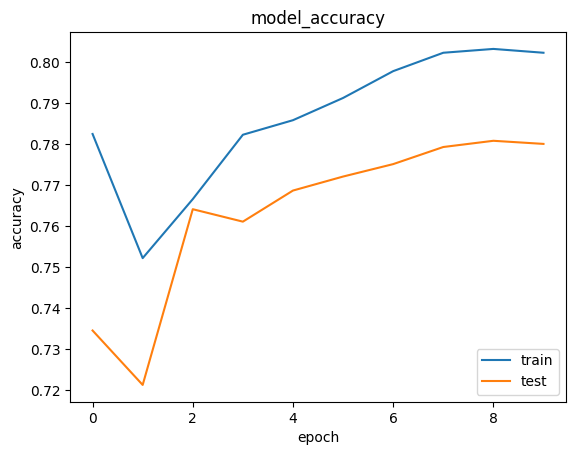

In [15]:
#list all data in hostory
print(model_history.history.keys())
#summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='lower right')
plt.show()

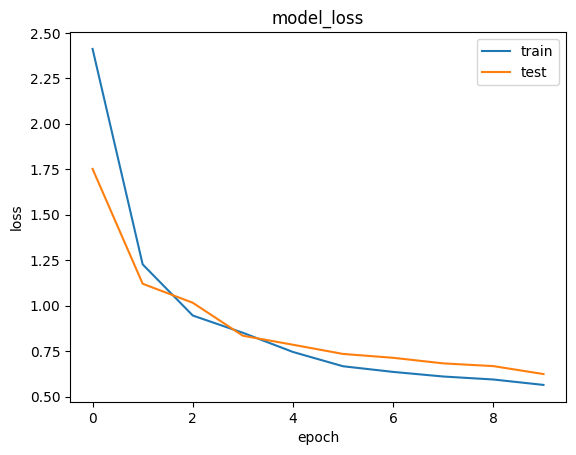

In [17]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper right')
plt.show()